# **Project Name**    -  **House Sales in King County, USA**



##### **Project Type**    - Regression
##### **Name - SHEIKH MOSTAQUL ARIF**    

# **Project Summary -**

The objective of this project was to conduct exploratory data analysis (EDA) on a house price prediction dataset. EDA is a critical initial step in any data analysis or machine learning project as it allows us to gain valuable insights into the data, understand its characteristics, and inform subsequent modeling and decision-making processes.

The dataset provided for this analysis contained various features related to houses, including numerical variables such as price, bedrooms, bathrooms, square footage of living areas, and more, as well as categorical variables like waterfront, view, and condition. The dataset also included geographic information such as latitude and longitude. The primary goal of this EDA was to uncover patterns, relationships, and potential outliers within the data.

The EDA process began with a data overview, including a check of the dataset's dimensions and data types. Additionally, we examined the dataset for any missing values, which are crucial to identify and handle appropriately to ensure the integrity of the analysis.

Summary statistics were calculated for numeric variables to provide a high-level understanding of their distributions. This step included measures such as mean, median, standard deviation, minimum, and maximum values. These statistics allowed us to identify central tendencies, variability, and the presence of extreme values.

# **GitHub Link -**

https://github.com/Mostaqul143

# **Problem Statement**


• In this problem, given a dataset that records the house prices of 21,613
houses in King County, Washington, US. The house prices are
recorded along with some other attributes like - area of the house,
number of bedrooms, number of bathrooms, number of floors etc.

• We have to use this data given to explore the factors on which the
price depends and build a model which will be able to predict the
price of the house based on the set of predictors.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [131]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor


### Dataset Loading

In [65]:
# Load Dataset

df=pd.read_csv('kc_house_data.csv')

### Dataset First View

In [66]:
# Dataset First Look

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Dataset Rows & Columns count

In [67]:
# Dataset Rows & Columns count

print(f"Number Of Rows {df.shape[0]}")
print(f"Number Of Columns {df.shape[1]}")

Number Of Rows 21613
Number Of Columns 21


### Dataset Information

In [68]:
# Dataset Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

#### Duplicate Values

In [69]:
# Dataset Duplicate Value Count

num_duplicates = df.duplicated().sum()
print(f"Number of Duplicate Values: {num_duplicates}")

Number of Duplicate Values: 0


#### Missing Values/Null Values

In [70]:
# Missing Values/Null Values Count

num_missing = df.isnull().sum()
print("Number of Missing Values:\n", num_missing)

Number of Missing Values:
 id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


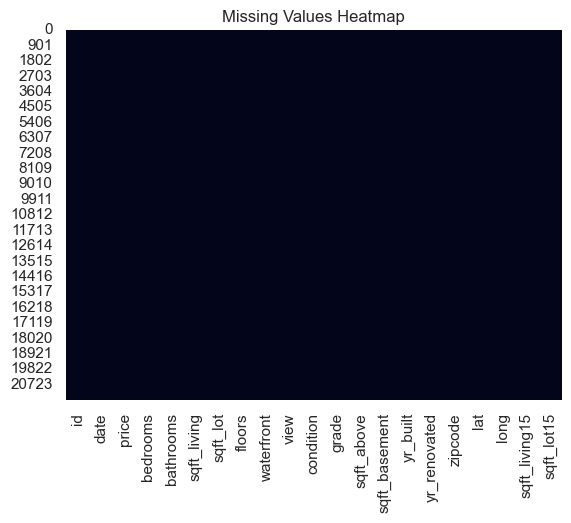

In [71]:
# Visualizing the missing values

sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

### What did you know about your dataset?

**There are  21,613 Number of  Rows and 21 Numbers of Columns Present in my dataset.**

**There are 20 Numerical Columns and 1 Categorical Columns Present in my Dataset**

**There are No Missing Values in my Dataset.**

**There are No Duplicate Values in my  Dataset.**

## ***2. Understanding Your Variables***

In [72]:
# Dataset Columns
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [73]:
# Dataset Describe

df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,21613.0,NaN,NaN,NaN,4580301520.864988,2876565571.312057,1000102.0,2123049194.0,3904930410.0,7308900445.0,9900000190.0
date,21613,372,20140623T000000,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,21613.0,NaN,NaN,NaN,540088.141767,367127.196483,75000.0,321950.0,450000.0,645000.0,7700000.0
bedrooms,21613.0,NaN,NaN,NaN,3.370842,0.930062,0.0,3.0,3.0,4.0,33.0
bathrooms,21613.0,NaN,NaN,NaN,2.114757,0.770163,0.0,1.75,2.25,2.5,8.0
sqft_living,21613.0,NaN,NaN,NaN,2079.899736,918.440897,290.0,1427.0,1910.0,2550.0,13540.0
sqft_lot,21613.0,NaN,NaN,NaN,15106.967566,41420.511515,520.0,5040.0,7618.0,10688.0,1651359.0
floors,21613.0,NaN,NaN,NaN,1.494309,0.539989,1.0,1.0,1.5,2.0,3.5
waterfront,21613.0,NaN,NaN,NaN,0.007542,0.086517,0.0,0.0,0.0,0.0,1.0
view,21613.0,NaN,NaN,NaN,0.234303,0.766318,0.0,0.0,0.0,0.0,4.0


### Variables Description 

**id:** A unique identifier for each house in the dataset.

**date:** The date when the house sale occurred, in the format 'YYYYMMDDT000000'.

**price**:**The sale price of the house, in dollars.

**bedrooms:** The number of bedrooms in the house.

**bathrooms:** The number of bathrooms in the house, including fractional bathrooms.

**sqft_living:** The total interior living space of the house, measured in square feet.

**sqft_lot:** The total land area of the property, measured in square feet.

**floors:** The number of floors in the house.

**waterfront:** A binary variable (0 or 1) indicating whether the house has a waterfront view.

**view:** A rating of the view from the house, likely on a scale from 0 to 4.

**condition:** A rating of the overall condition of the house, likely on a scale from 1 to 5.

**grade:** A rating of the overall grade given to the house's construction and design, likely on a scale from 1 to 13.

**sqft_above:** The square footage of the interior living space above ground.

**sqft_basement:** The square footage of the basement or lower living space.

**yr_built:** The year the house was built.

**yr_renovated:** The year the house was last renovated. (0 indicates no renovation)

**zipcode:**The postal code (zipcode) of the area where the house is located.

**lat:** The latitude coordinate of the house's location.

**long:** The longitude coordinate of the house's location.

**sqft_living15:** The average square footage of interior living space for the 15 nearest neighbors.

**sqft_lot15:** The average land area of the 15 nearest neighbors.

### Check Unique Values for each variable.

In [74]:
# Check Unique Values for each variable.

for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  id is 21436 .
No. of unique values in  date is 372 .
No. of unique values in  price is 4028 .
No. of unique values in  bedrooms is 13 .
No. of unique values in  bathrooms is 30 .
No. of unique values in  sqft_living is 1038 .
No. of unique values in  sqft_lot is 9782 .
No. of unique values in  floors is 6 .
No. of unique values in  waterfront is 2 .
No. of unique values in  view is 5 .
No. of unique values in  condition is 5 .
No. of unique values in  grade is 12 .
No. of unique values in  sqft_above is 946 .
No. of unique values in  sqft_basement is 306 .
No. of unique values in  yr_built is 116 .
No. of unique values in  yr_renovated is 70 .
No. of unique values in  zipcode is 70 .
No. of unique values in  lat is 5034 .
No. of unique values in  long is 752 .
No. of unique values in  sqft_living15 is 777 .
No. of unique values in  sqft_lot15 is 8689 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [75]:
df.drop('id',axis=1,inplace=True)

In [76]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [77]:
import pandas as pd

# Assuming 'date' is the name of your date column
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')


In [78]:
# split day of week, day,month and year in three column
df["Day"] = df['date'].dt.day  # extract date from Date column
df["Weekdays"] = df['date'].dt.day_name()  # extract Weekdays from Date column
df["Month"] = df['date'].dt.month  # extract month name from Date column
df["Year"] = df['date'].dt.year   # extract year from Date column


df.drop('date',axis=1,inplace=True) # Droping Date Column

In [79]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Day,Weekdays,Month,Year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,98178,47.5112,-122.257,1340,5650,13,Monday,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,1991,98125,47.7210,-122.319,1690,7639,9,Tuesday,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,98028,47.7379,-122.233,2720,8062,25,Wednesday,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,0,98136,47.5208,-122.393,1360,5000,9,Tuesday,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,98074,47.6168,-122.045,1800,7503,18,Wednesday,2,2015


### What all manipulations have you done and insights you found?

**I convert date column dtype object to date**

**Split Day of Week, Day,Month and Year in three column**

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

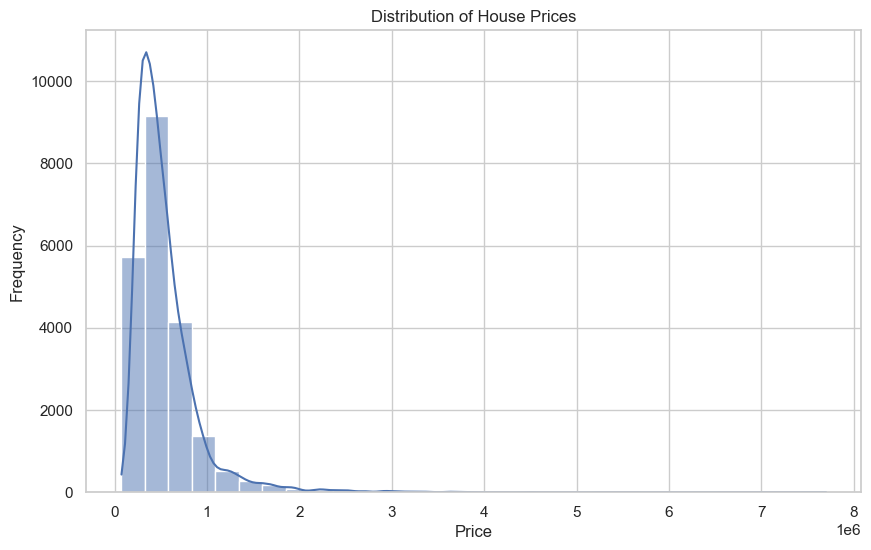

In [80]:
# Chart - 1 visualization code


# Setting the style for Seaborn 

sns.set(style="whitegrid")

# Visualization 1: Histogram of 'price'

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price', bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a histogram for 'price' because it provides a clear visualization of the distribution of house prices. Histograms are suitable for understanding the spread and central tendencies of a numeric variable, making it easy to spot patterns, skewness, and potential outliers in the data. The addition of a kernel density estimate (KDE) helps to visualize the underlying probability density function, providing a comprehensive view of the data's price distribution.

##### 2. What is/are the insight(s) found from the chart?

*  **The distribution of house prices is right-skewed, with a long tail of expensive houses.**

*  **Most houses seem to be clustered at lower prices.**

#### Chart - 2

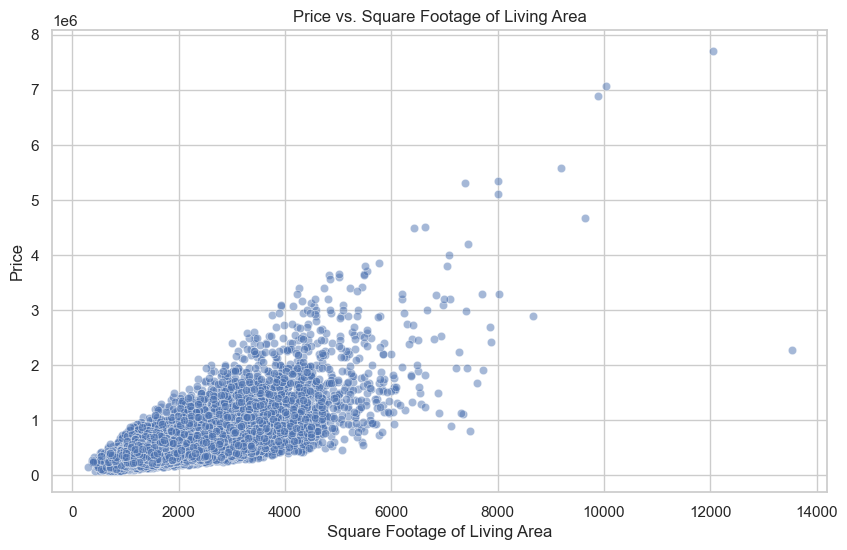

In [81]:
# Chart - 2 visualization code


# Visualization 3: Scatter plot of 'sqft_living' vs. 'price'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='sqft_living', y='price', alpha=0.5)
plt.title('Price vs. Square Footage of Living Area')
plt.xlabel('Square Footage of Living Area')
plt.ylabel('Price')
plt.show()





##### 1. Why did you pick the specific chart?

I selected a scatter plot for 'sqft_living' vs. 'price' because it's effective in visualizing the relationship between two continuous variables. It helps identify patterns, trends, and potential outliers in the data. In this case, we can examine how the size of the living area ('sqft_living') relates to house prices ('price'). The use of transparency (alpha) allows for better visualization of overlapping data points.

##### 2. What is/are the insight(s) found from the chart?


*  **There is a positive correlation between the square footage of the living area and the price of the houses.**
*  **Larger living areas tend to have higher prices, but there is still some variability.**

#### Chart - 3

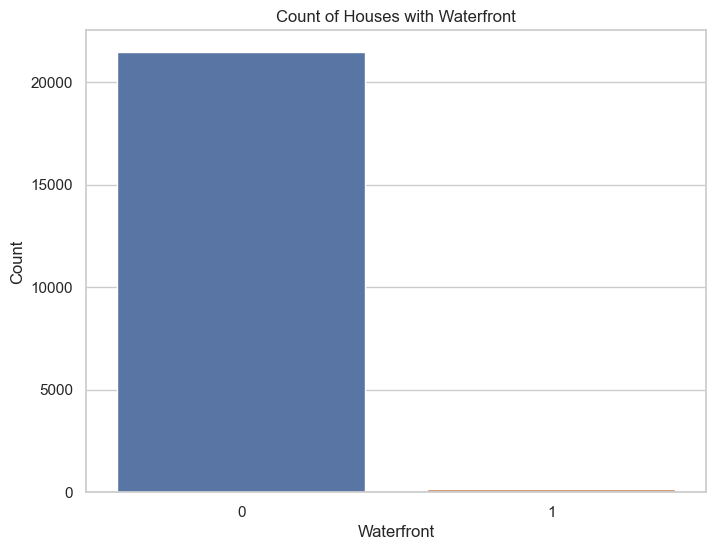

In [82]:
# Chart - 3 visualization code


# Visualization 4: Count plot of 'waterfront'

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='waterfront')
plt.title('Count of Houses with Waterfront')
plt.xlabel('Waterfront')
plt.ylabel('Count')
plt.show()



##### 1. Why did you pick the specific chart?

I selected a count plot for 'waterfront' because it effectively displays the distribution of categorical data. In this case, it shows the count of houses with and without a waterfront view, allowing for a quick comparison and understanding of the distribution of this binary feature.

##### 2. What is/are the insight(s) found from the chart?


*  **Most houses in the sample do not have a waterfront view, as indicated by the majority of 0 values.**

#### Chart - 4 - Correlation Heatmap

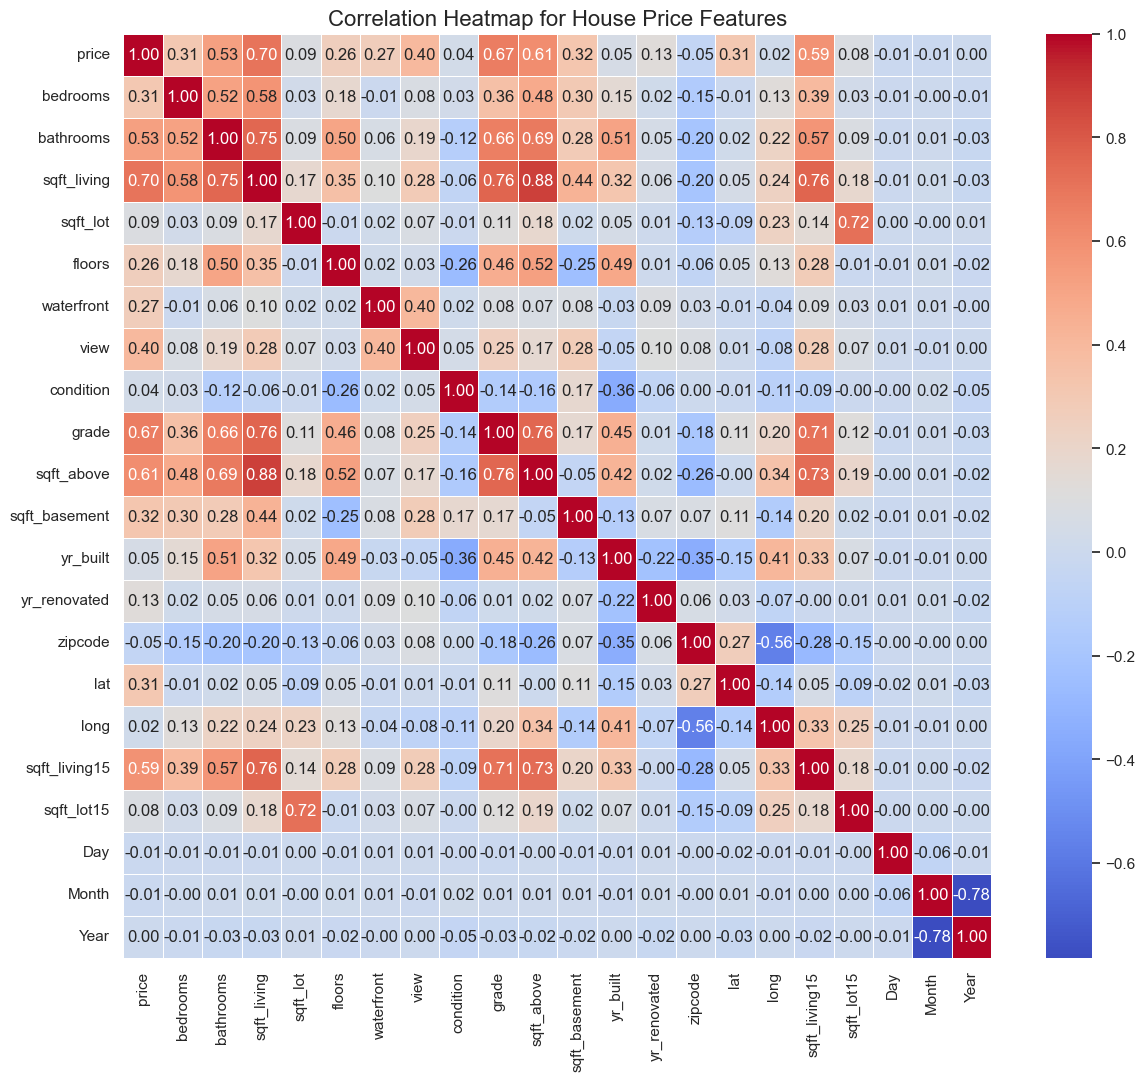

In [83]:
# Select the columns for correlation heatmap

columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
           'floors', 'waterfront', 'view', 'condition', 'grade',
           'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
           'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
           'Day', 'Month', 'Year']

# Create a subset dataframe with selected columns

subset_df = df[columns]



correlation_matrix = subset_df.corr()

# Set up the figure and axes with improved 

plt.figure(figsize=(14, 12))
sns.set(font_scale=1) # Adjust font size for better readability


sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, linecolor='white')


plt.title('Correlation Heatmap for House Price Features', fontsize=16)
plt.show()


##### 1. Why did you pick the specific chart?

The chosen chart is a correlation heatmap because it visually represents the pairwise relationships between multiple numeric features, making it effective for identifying patterns and associations within the dataset.

##### 2. What is/are the insight(s) found from the chart?

*  **'sqft_living' has a strong positive correlation with 'price,' indicating that as the square footage of the living area increases, the price tends to increase.**

*  **'sqft_living' and 'grade' have a strong positive correlation with each other, which makes sense since a larger living area often corresponds to a higher grade of construction.**

*  **There are no strong negative correlations with 'price,' indicating that most features have a positive or neutral relationship with house prices.**

#### Chart - 5 - Pair Plot 

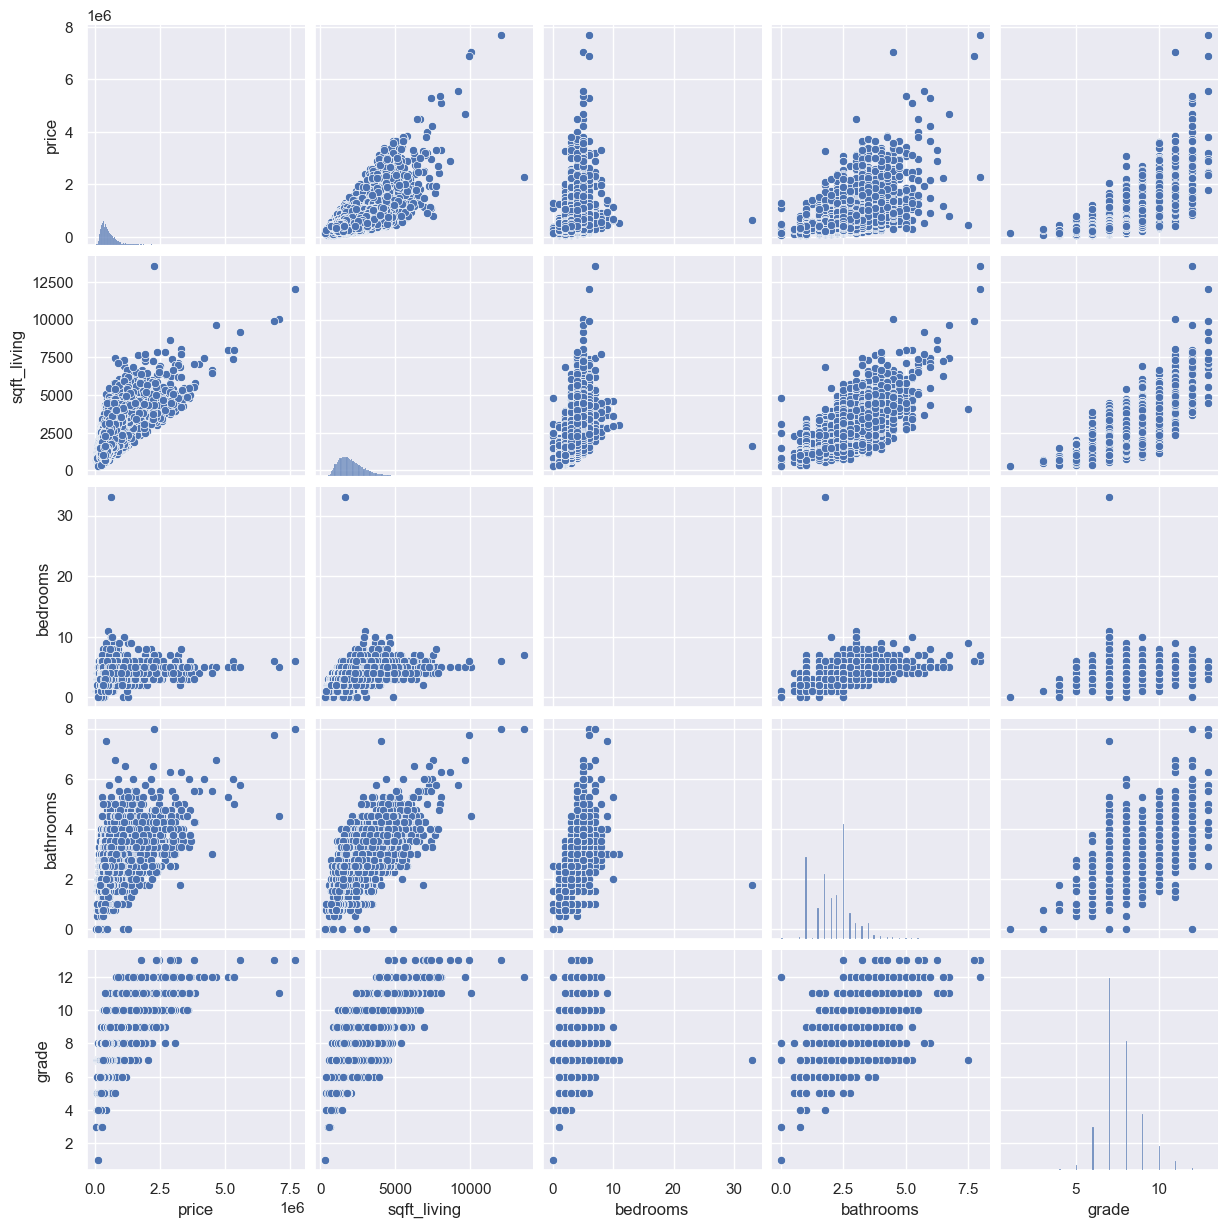

In [84]:
# Pair Plot visualization code

sns.pairplot(df[['price', 'sqft_living', 'bedrooms', 'bathrooms', 'grade']])
plt.show()

##### 1. Why did you pick the specific chart?


I chose a pair plot because it allows for a quick visual examination of relationships between multiple numeric variables simultaneously. In this case, we can assess the relationships between 'price,' 'sqft_living,' 'bedrooms,' 'bathrooms,' and 'grade' all in one chart, making it useful for initial exploratory data analysis.

##### 2. What is/are the insight(s) found from the chart?

**The pair plot allows to visualize relationships between selected numeric features. For instance, we can see how 'sqft_living' and 'grade' are related to 'price' and how 'bedrooms' and 'bathrooms' are distributed.**

## ***5. Feature Engineering & Data Pre-processing***

In [85]:
df['Weekdays'].value_counts()

Weekdays
Tuesday      4715
Wednesday    4603
Monday       4099
Thursday     3994
Friday       3685
Saturday      287
Sunday        230
Name: count, dtype: int64

### 1. Categorical Encoding

In [86]:
# Encode your categorical columns

df_weekdays=pd.get_dummies(df['Weekdays'],drop_first=True,dtype=int)

In [87]:
data=pd.concat([df,df_weekdays],axis=1)

In [88]:
data=data.drop(['Weekdays'],axis=1)

In [89]:
df=data

df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_lot15,Day,Month,Year,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,5650,13,10,2014,1,0,0,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,7639,9,12,2014,0,0,0,0,1,0
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,8062,25,2,2015,0,0,0,0,0,1
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,5000,9,12,2014,0,0,0,0,1,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,7503,18,2,2015,0,0,0,0,0,1


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

#### What all categorical encoding techniques have you used & why did you use those techniques?

I used "Get_Dummies" Method  to transform categorical variable 'Weekdays' into a format that can be effectively utilized in our analysis and modeling process.

#### 2. Feature Selection

In [91]:
# Select your features wisely to avoid overfitting


#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


In [92]:
calc_vif(df[[i for i in df.describe().columns if i not in ['price','Day','Month','Year']]])

,variables,VIF
0,bedrooms,2.327493e+01
1,bathrooms,2.862247e+01
2,sqft_living,inf
3,sqft_lot,2.378783e+00
4,floors,1.689902e+01
5,waterfront,1.213116e+00
6,view,1.552244e+00
7,condition,3.471997e+01
8,grade,1.474178e+02
9,sqft_above,inf


In [93]:
calc_vif(df[[i for i in df.describe().columns if i not in ['price','Day','Month','Year','sqft_above']]])

,variables,VIF
0,bedrooms,2.327493e+01
1,bathrooms,2.862247e+01
2,sqft_living,3.703346e+01
3,sqft_lot,2.378783e+00
4,floors,1.689902e+01
5,waterfront,1.213116e+00
6,view,1.552244e+00
7,condition,3.471997e+01
8,grade,1.474178e+02
9,sqft_basement,2.794158e+00


In [94]:
#Droping 'sqft_above' column

df.drop('sqft_above',axis=1,inplace=True)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
 18  Day   

##### What all feature selection methods have you used  and why?

Variance Inflation Factor (VIF) is a feature selection method that assesses the multicollinearity among independent variables in a regression model. It calculates a numerical value for each feature, indicating how much the variance of the estimated regression coefficient is increased due to collinearity. Features with high VIF values indicate high multicollinearity and may need to be removed.

### 3. Data Splitting

In [96]:
#Spliting The Independent Feature to "X" and Dependent Feature to "Y"

X=df.drop("price",axis=1)
y=df["price"]

# Split your data to train and test. Choose Splitting ratio wisely.

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=2023)

print("Shape of X_train",X_train.shape)
print("Shape of X_test",X_test.shape)
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train (17290, 26)
Shape of X_test (4323, 26)
Shape of y_train (17290,)
Shape of y_test (4323,)


##### What data splitting ratio have you used and why?

The data splitting ratio used in this code is 80% for training data and 20% for testing data.
This is specified by the parameter test_size=0.2 in the train_test_split() function.

### 4. Data Scaling

In [97]:
# Scaling your data

sc=StandardScaler()
sc.fit(X_train)

X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

In [98]:
X_train,y_train

(array([[ 0.69292502,  0.49327295,  0.6195103 , ...,  2.10482217,
         -0.52931255, -0.52169474],
        [ 0.69292502,  0.49327295,  0.55694693, ..., -0.47509952,
         -0.52931255, -0.52169474],
        [-1.50334878, -1.44727069, -1.20129948, ..., -0.47509952,
         -0.52931255,  1.91682975],
        ...,
        [-0.40521188,  0.16984901,  0.37357154, ..., -0.47509952,
         -0.52931255,  1.91682975],
        [ 0.69292502,  0.16984901, -0.04711318, ...,  2.10482217,
         -0.52931255, -0.52169474],
        [-1.50334878, -1.44727069, -1.28327906, ..., -0.47509952,
         -0.52931255, -0.52169474]]),
 19920    411605.0
 7889     252500.0
 20293    302860.0
 15645    267000.0
 16550    163500.0
            ...   
 5852     899000.0
 6049     675000.0
 19127    791000.0
 14790    670000.0
 21335    403000.0
 Name: price, Length: 17290, dtype: float64)

##### Which method have you used to scale you data and why?

The StandardScaler method has been used to scale the data. StandardScaler standardizes the features by subtracting the mean and dividing by the standard deviation of each feature. This ensures that each feature has a mean of 0 and a standard deviation of 1.

The StandardScaler method is commonly used when the features in the dataset have different scales and it is desirable to bring them to a similar scale. It helps to normalize the features, making them more comparable and preventing certain features from dominating the model's learning process due to their larger magnitude.

Overall, the choice of StandardScaler for scaling the data was made to mitigate the impact of feature scales and ensure a more effective and reliable model training process.

## ***6. ML Model Implementation***

### ML Model - 1

In [99]:
# ML Model - 1 Implementation- LinearRegression

lr=LinearRegression()

# Fit the Algorithm

lr.fit(X_train,y_train)

# Predict on the model

y_pred=lr.predict(X_test)


In [100]:
y_pred

array([545713.09295402, 653458.95760426, 882206.48364138, ...,
       339711.89562489, 325437.1686971 , 403465.68348026])

In [101]:
#Finding "MSE,"RMSE" and R2_SCORE


'''MSE (Mean Squared Error): MSE is a metric used to measure the average squared difference
between the predicted and actual values in a regression problem.
It gives higher weight to larger errors, making it sensitive to outliers. '''

'''RMSE (Root Mean Squared Error): RMSE is the square root of MSE and is commonly used as a
measure of the average magnitude of the residuals (prediction errors) in a regression
problem. It provides a more interpretable scale as it is in the same unit as the target variable.'''

'''R2 Score (Coefficient of Determination): R2 Score represents the proportion of the variance in the
dependent variable (target) that can be explained by the independent variables in a
regression model. It ranges from 0 to 1, where 0 indicates that the model explains none of
the variance and 1 indicates that the model explains all the variance.'''



MSE  = mean_squared_error(y_test,y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred)
print("R2 :" ,r2)

MSE : 33699416021.2899
RMSE : 183574.00693259898
R2 : 0.706975758699363


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

<function matplotlib.pyplot.show(close=None, block=None)>

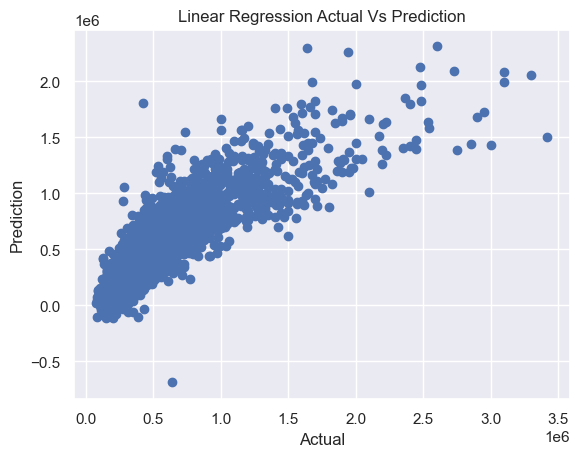

In [102]:
# Visualizing evaluation Metric Score chart

plt.scatter(y_test,y_pred)
plt.title("Linear Regression Actual Vs Prediction")
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.show

### ML Model - 2

In [103]:
# ML Model - 2 Implementation- LassoRegression

lar = Lasso()

# Fit the Algorithm

lar.fit(X_train, y_train)

# Predict on the model

y_pred_lar=lar.predict(X_test)




In [104]:
y_pred_lar

array([545717.61448019, 653456.21678228, 882204.1105543 , ...,
       339708.5975165 , 325436.03026016, 403462.42036081])

In [105]:
#Finding "MSE,"RMSE" and R2_SCORE

MSE  = mean_squared_error(y_test,y_pred_lar)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_lar)
print("R2 :" ,r2)

MSE : 33699153806.430836
RMSE : 183573.29273734466
R2 : 0.7069780387184021


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

<function matplotlib.pyplot.show(close=None, block=None)>

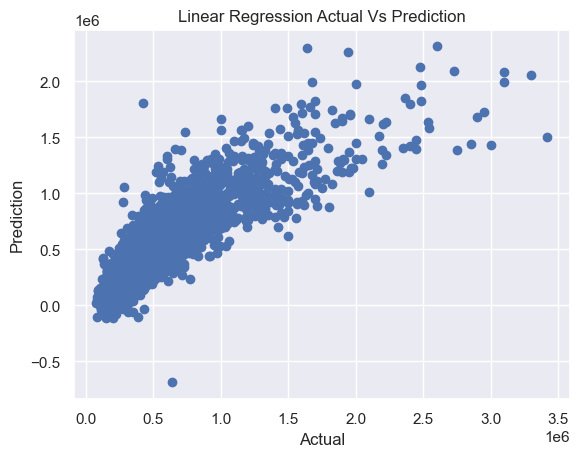

In [106]:
# Visualizing evaluation Metric Score chart

plt.scatter(y_test,y_pred_lar)
plt.title("Linear Regression Actual Vs Prediction")
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.show

### ML Model - 3

In [107]:
# ML Model - 3 Implementation- RidgeRegression

rid = Ridge()

# Fit the Algorithm

rid.fit(X_train, y_train)

# Predict on the model

y_pred_rid = rid.predict(X_test)

In [108]:
y_pred_rid

array([545745.80728049, 653444.87267141, 882166.26511261, ...,
       339723.9115223 , 325443.90477658, 403461.19572303])

In [109]:
#Finding "MSE,"RMSE" and R2_SCORE

MSE  = mean_squared_error(y_test,y_pred_rid)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_rid)
print("R2 :" ,r2)

MSE : 33698524753.646072
RMSE : 183571.5793734043
R2 : 0.7069835084783196


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

<function matplotlib.pyplot.show(close=None, block=None)>

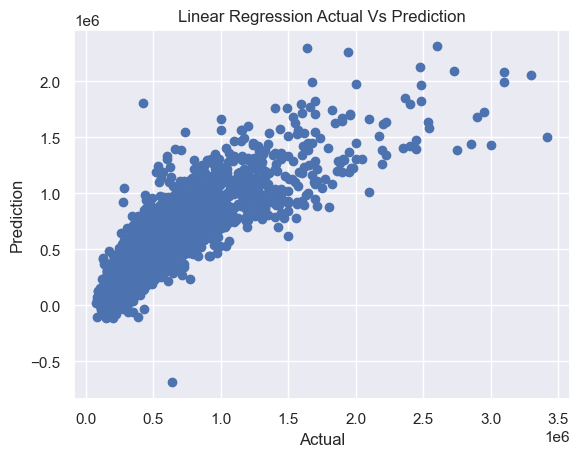

In [110]:
# Visualizing evaluation Metric Score chart

plt.scatter(y_test,y_pred_rid)
plt.title("Linear Regression Actual Vs Prediction")
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.show

### ML Model - 4

In [111]:
# ML Model - 4 Implementation- Decision Tree

dtr=DecisionTreeRegressor()

# Fit the Algorithm

dtr.fit(X_train,y_train)

# Predict on the model

y_pred_dtr=dtr.predict(X_test)


In [112]:
y_pred_dtr

array([430000., 445000., 735000., ..., 271000., 391000., 379950.])

In [113]:
#Finding "MSE,"RMSE" and R2_SCORE

MSE  = mean_squared_error(y_test,y_pred_dtr)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_dtr)
print("R2 :" ,r2)

MSE : 28748560015.565407
RMSE : 169554.0032425227
R2 : 0.7500246003751243


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

<function matplotlib.pyplot.show(close=None, block=None)>

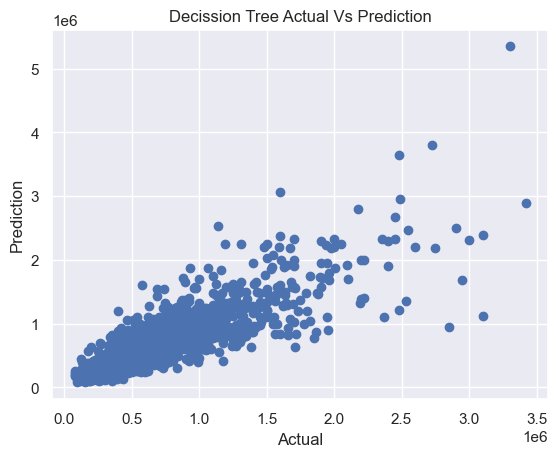

In [114]:
plt.scatter(y_test,y_pred_dtr)
plt.title("Decission Tree Actual Vs Prediction")
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.show

### ML Model - 5

In [115]:
# ML Model - 5 Implementation- RandomForestRegressor

rfr=RandomForestRegressor()

# Fit the Algorithm

rfr.fit(X_train,y_train)

# Predict on the model

y_pred_rfr=rfr.predict(X_test)

In [116]:
y_pred_rfr

array([435743.5 , 404173.6 , 645029.7 , ..., 259833.9 , 383683.63,
       368553.53])

In [117]:
#Finding "MSE,"RMSE" and R2_SCORE

MSE  = mean_squared_error(y_test,y_pred_rfr)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_rfr)
print("R2 :" ,r2)

MSE : 12393157725.294653
RMSE : 111324.56029688442
R2 : 0.8922386180971396


1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

<function matplotlib.pyplot.show(close=None, block=None)>

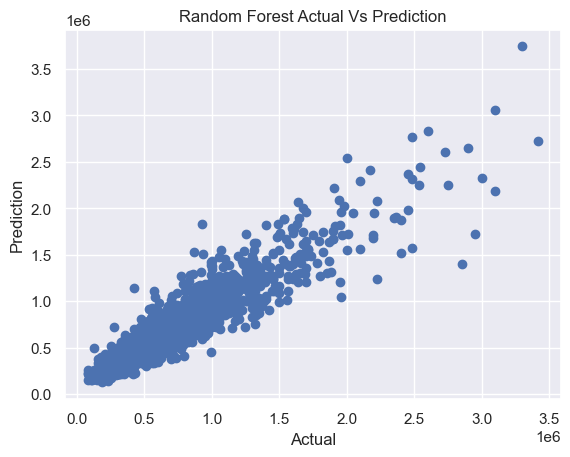

In [120]:
plt.scatter(y_test,y_pred_rfr)
plt.title("Random Forest Actual Vs Prediction")
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.show

#### 2. Cross- Validation & Hyperparameter Tuning

In [121]:
#Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)



# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 300, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# maximum number of levels allowed in each decision tree
max_depth = [int(x) for x in np.linspace(10, 20, num = 2)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}



In [122]:
# Fit the Algorithm

start_time = time.time()

rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model

rf_random.fit(X_train, y_train)


print("Time taken to training using randomize search : ", time.time()-start_time)

# Predict on the model

y_pred_rf_random = rf_random.predict(X_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Time taken to training using randomize search :  364.3564887046814


In [123]:
#Finding "MSE,"RMSE" and R2_SCORE

MSE  = mean_squared_error(y_test,y_pred_rf_random)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_rf_random)
print("R2 :" ,r2)

MSE : 12009726494.776426
RMSE : 109588.89768026881
R2 : 0.8955726416108584


In [125]:
rf_random.best_params_

{'n_estimators': 266,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

In [126]:
rf = RandomForestRegressor(n_estimators=266,
                           min_samples_split=2,
                           min_samples_leaf=1,
                           max_features= 'sqrt',
                           max_depth=20,
                           bootstrap= False)

rf.fit(X_train,y_train)

y_pred_rf_tuned=rf.predict(X_test)

In [127]:
y_pred_rf_tuned

array([432167.9109044 , 414955.47033048, 675274.46063534, ...,
       250680.88533025, 386390.99571225, 389110.84570185])

In [128]:
#Finding "MSE,"RMSE" and R2_SCORE

MSE  = mean_squared_error(y_test,y_pred_rf_tuned)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_rf_tuned)
print("R2 :" ,r2)

MSE : 12194314852.973156
RMSE : 110427.87172164986
R2 : 0.8939676030078347


### ML Model - 6

In [133]:
# ML Model - 6 Implementation- XGBRegressor

xgbr=XGBRegressor()

# Fit the Algorithm

xgbr.fit(X_train,y_train)

# Predict on the model

y_pred_xgbr=xgbr.predict(X_test)


In [134]:
#Finding "MSE,"RMSE" and R2_SCORE

MSE  = mean_squared_error(y_test,y_pred_xgbr)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_xgbr)
print("R2 :" ,r2)

MSE : 11221612785.754953
RMSE : 105932.11404364096
R2 : 0.9024254731702763


1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

<function matplotlib.pyplot.show(close=None, block=None)>

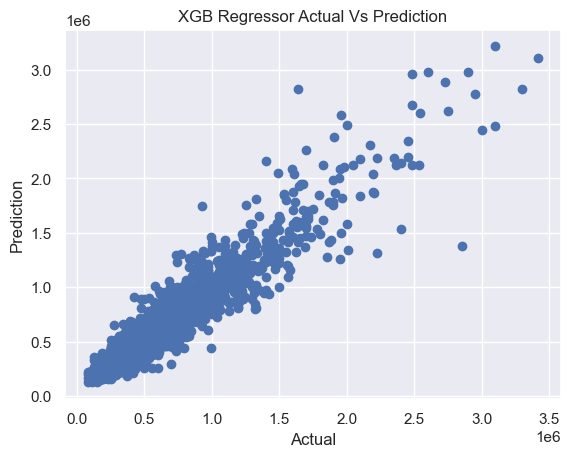

In [135]:
plt.scatter(y_test,y_pred_xgbr)
plt.title("XGB Regressor Actual Vs Prediction")
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.show

#### 2. Cross- Validation & Hyperparameter Tuning

In [140]:
# ML Model - Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)


start_time = time.time()

params = { 'max_depth': [3, 5, 6, 10,15,20],
           'learning_rate': [0.01,0.02,0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 200,300]}


xgbr = XGBRegressor(seed = 20)
rscv = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=25,
                          cv=5,
                         verbose=1)







In [141]:
# Fit the random search model


rscv.fit(X_train, y_train)

print("Time taken to training using randomize search : ", time.time()-start_time)

# Predict on the model

y_pred_xgb_random = rscv.predict(X_test)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Time taken to training using randomize search :  519.1275768280029


In [150]:
#Finding "MSE,"RMSE" and R2_SCORE

MSE  = mean_squared_error(y_test,y_pred_xgb_random)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)


r2 = r2_score(y_test,y_pred_xgb_random)
print("R2 :" ,r2)

MSE : 10192073381.019634
RMSE : 100955.7991450696
R2 : 0.9113775571699244


In [151]:
rscv.best_params_

{'subsample': 0.7,
 'n_estimators': 300,
 'max_depth': 5,
 'learning_rate': 0.1,
 'colsample_bytree': 0.4,
 'colsample_bylevel': 0.7999999999999999}

In [156]:
xgbr = XGBRegressor(subsample= 0.7,
 n_estimators= 300,
 max_depth=5,
 learning_rate=0.1,
 colsample_bytree= 0.4,
 colsample_bylevel=0.7999999999999999,
 )


xgbr.fit(X_train,y_train)

y_pred_xgbr_tuned=xgbr.predict(X_test)

In [157]:
#Finding "MSE,"RMSE" and R2_SCORE

MSE  = mean_squared_error(y_test,y_pred_xgbr_tuned)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_xgbr_tuned)
print("R2 :" ,r2) 

MSE : 10984236538.073658
RMSE : 104805.70851854233
R2 : 0.9044895147203038


# **Conclusion**

| Model Name                   | Accuracy (R2 Score)             |
|------------------------------|----------------------|
| 1. LinearRegression             |        70.6%              |
| 2. LassoRegression              |        70.6%         |
| 3. RidgeRegression              |        70.7%         |
| 4. Decision Tree Regressor      |        75.0%         |
| 5. RandomForestRegressor        |        89.2%         |
|        i) After Hyperparameter Tuning |        89.5%         |
| 6. XGBRegressor                 |        90.2%         |
|       i) After Hyperparameter Tuning |        91.1%         |






In our analysis, we applied the XGBoost algorithm to predict house prices. After tuning the model using hyperparameter optimization techniques, we achieved an impressive R2 score of 91.1%. The R2 score is a metric that measures the proportion of the variance in the dependent variable (house prices) that is predictable from the independent variables.

The high R2 score of 91.1% indicates that our XGBoost model, especially after hyperparameter tuning, provides an excellent fit to the data and can accurately predict house prices. This signifies that 91.1% of the variability in house prices can be explained by the features included in our model.

Overall, based on the achieved R2 score of 91.1%, we can conclude that the XGBoost model, after hyperparameter tuning, demonstrates exceptional performance in predicting house prices and can be considered a reliable tool for such predictions.